<a href="https://colab.research.google.com/github/celeneheng/IS160Binder/blob/3---MNIST/DL_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bee Chang and Yadira Heng

In [ ]:
#loading in the IMDB database

from tensorflow.keras.datasets import imdb

In [ ]:
#setting meaning and values to training data; limiting the word value to a managable 10,000

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
#list of reviews; each review is a list of word indices(encoding a sequence of words)

train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
#training for a list of 1s and 0s; 1s being negative and 0s being positive

train_labels[0]

1

In [ ]:
#for importing sequencing

from collections.abc import Sequence


In [ ]:
#we set a max of 10,000 and checking if it goes over, which it shouldn't

max([max(sequence) for sequence in train_data])

9999

In [ ]:
#decoding reviews back into text
#cannot feed lists of int to a NN, so turn them into tensors

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
#encoding the int sequences via muliti-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] =1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#building a model with model definition

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
import tensorflow as tf

# Define your input data as a TensorFlow tensor
input_data = tf.constant([[1.0, 2.0]])

input_dim = 2
output_dim = 1

# Define your weight matrix (W) and bias (b) using TensorFlow variables
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Perform the linear transformation and ReLU activation
linear_transform = tf.matmul(input_data, W) + b
output = tf.nn.relu(linear_transform)


In [ ]:
#compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
#setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data= (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 149ms/step - loss: 0.5236 - accuracy: 0.7709 - val_loss: 0.4043 - val_accuracy: 0.8507
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3195 - accuracy: 0.8967 - val_loss: 0.3231 - val_accuracy: 0.8760
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2394 - accuracy: 0.9212 - val_loss: 0.2815 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1955 - accuracy: 0.9349 - val_loss: 0.2860 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1648 - accuracy: 0.9455 - val_loss: 0.2757 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1413 - accuracy: 0.9547 - val_loss: 0.2819 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1203 - accuracy: 0.9638 - val_loss: 0.3147 - val_accuracy: 0.8747
Epoch 8/20
3

In [ ]:
history_dict=history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

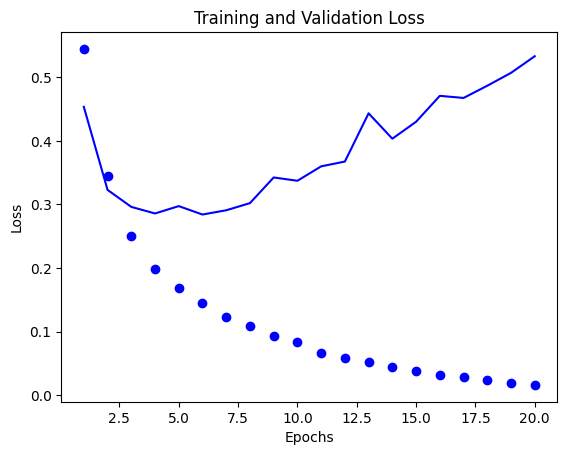

In [ ]:
#plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

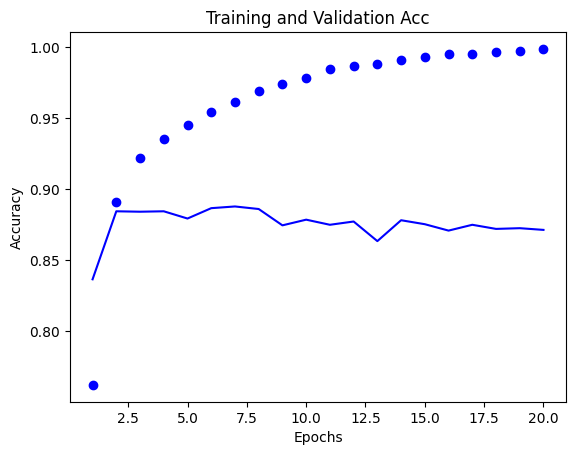

In [ ]:
#plotting the training and validation accuracy

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#retraining the model from scratch to see effectiveness

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.4802 - accuracy: 0.8150
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2832 - accuracy: 0.8991
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2187 - accuracy: 0.9204
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3104 - accuracy: 0.8746


In [ ]:
#using the trained model for predictive data

model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.13151819],
       [0.9991238 ],
       [0.5296624 ],
       ...,
       [0.05360326],
       [0.04693668],
       [0.31760007]], dtype=float32)

An accuracy of 0.8746 is quite good, suggesting that the model is performing well in terms of correctly classifying the data. However, the loss of 0.3104 indicates that there is still room for improvement in reducing the error in the model's predictions.

## Heart disease data


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess the CSV data

data = pd.read_csv('heart.csv')

# Assuming the CSV has columns 'feature1', 'feature2', and 'label'
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a binary classification model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
7/7 [==============================] - 3s 98ms/step - loss: 0.8214 - accuracy: 0.3472 - val_loss: 0.8538 - val_accuracy: 0.2653
Epoch 2/10
7/7 [==============================] - 0s 22ms/step - loss: 0.7746 - accuracy: 0.4145 - val_loss: 0.8158 - val_accuracy: 0.3469
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 0.7390 - accuracy: 0.4974 - val_loss: 0.7824 - val_accuracy: 0.4286
Epoch 4/10
7/7 [==============================] - 0s 25ms/step - loss: 0.7080 - accuracy: 0.5337 - val_loss: 0.7516 - val_accuracy: 0.5102
Epoch 5/10
7/7 [==============================] - 0s 16ms/step - loss: 0.6802 - accuracy: 0.6010 - val_loss: 0.7201 - val_accuracy: 0.5102
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 0.6548 - accuracy: 0.6477 - val_loss: 0.6926 - val_accuracy: 0.5306
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.6316 - accuracy: 0.6943 - val_loss: 0.6696 - val_accuracy: 0.5714
Epoch 8/10
7/7 [===========

In [ ]:
#using the trained model for predictive data

model.predict(x_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid that covers the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the model to make predictions on the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = model.predict(mesh_points).reshape(xx.shape)

# Create a contour plot of the decision boundary
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Decision Boundary')

# Show the plot
plt.show()


 The model is showing moderate performance with an accuracy of 80.33%. However, the relatively high loss value of 0.5578 indicates that the model's predictions are not very accurate on average.

## Womens Clothing E-Commerce Reviews Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# count the number of missing (or NaN) values in each column of a DataFrame
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.isnull().sum().sum()

4697

In [ ]:
pip install nltk


In [ ]:
# Fill null values in the 'reviews' column with an empty string
df['Review Text'].fillna('', inplace=True)


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
# Fill null values in the 'reviews' column with an empty string
df['Title'].fillna('', inplace=True)


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review and create a new column with sentiment scores
df['sentiment'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review and create a new column with sentiment scores
df['sentiment_1'] = df['Title'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
def sentiment_to_rating(sentiment_score):
    if sentiment_score > 0.1:
        return 5  # Positive sentiment
    elif sentiment_score < -0.1:
        return 1  # Negative sentiment
    else:
        return 3  # Neutral sentiment

# Apply the function to create a new column with numerical ratings
df['Review Text Sentiment'] = df['sentiment'].apply(sentiment_to_rating)


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment,sentiment_1,Review Text Sentiment
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,0.0000,5
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,0.0000,5
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,0.0000,5
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,0.5093,5
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,0.3182,5


In [ ]:
def sentiment_to_rating(sentiment_score):
    if sentiment_score > 0.1:
        return 5  # Positive sentiment
    elif sentiment_score < -0.1:
        return 1  # Negative sentiment
    else:
        return 3  # Neutral sentiment

# Apply the function to create a new column with numerical ratings
df['Title Sentiment'] = df['sentiment_1'].apply(sentiment_to_rating)


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment,sentiment_1,Review Text Sentiment,Title Sentiment
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,0.0000,5,3
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,0.0000,5,3
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,0.0000,5,3
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,0.5093,5,5
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,0.3182,5,5


In [ ]:
columns_to_delete = ['sentiment',	'sentiment_1']
df = df.drop(columns=columns_to_delete)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text Sentiment,Title Sentiment
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,5,3
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,5,3
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,5,3
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,5,5
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,5,5


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Review Text Sentiment',
       'Title Sentiment'],
      dtype='object')

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Assume that you have a column 'features' for input features and a column 'labels' for multiclass labels
X = df[['Rating', 'Review Text Sentiment', 'Title Sentiment']]
y = df['Recommended IND']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a binary classification model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
470/470 [==============================] - 4s 5ms/step - loss: 0.2824 - accuracy: 0.8679 - val_loss: 0.1916 - val_accuracy: 0.9146
Epoch 2/10
470/470 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.9192 - val_loss: 0.1558 - val_accuracy: 0.9239
Epoch 3/10
470/470 [==============================] - 2s 5ms/step - loss: 0.1555 - accuracy: 0.9255 - val_loss: 0.1467 - val_accuracy: 0.9239
Epoch 4/10
470/470 [==============================] - 1s 3ms/step - loss: 0.1487 - accuracy: 0.9291 - val_loss: 0.1448 - val_accuracy: 0.9407
Epoch 5/10
470/470 [==============================] - 1s 3ms/step - loss: 0.1458 - accuracy: 0.9318 - val_loss: 0.1401 - val_accuracy: 0.9361
Epoch 6/10
470/470 [==============================] - 3s 6ms/step - loss: 0.1434 - accuracy: 0.9347 - val_loss: 0.1401 - val_accuracy: 0.9361
Epoch 7/10
470/470 [==============================] - 1s 3ms/step - loss: 0.1430 - accuracy: 0.9361 - val_loss: 0.1397 - val_accuracy: 0.9284
Epoch 

 These results indicate that the model is performing very well. It has a low loss value, indicating accurate predictions, and a high accuracy, indicating that it correctly classifies a significant portion of the test data.

### Insurance Data

In [ ]:
#load csv data to be read

import numpy as np
import pandas as pd

df = pd.read_csv('aug_train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Vehicle_Damage'])
print(label)

[0 1 1 ... 1 0 0]


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Assume that you have a column 'features' for input features and a column 'labels' for multiclass labels
X = df[['Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a binary classification model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
7644/7644 [==============================] - 14s 2ms/step - loss: 11.1054 - accuracy: 0.7434 - val_loss: 6.8326 - val_accuracy: 0.8383
Epoch 2/10
7644/7644 [==============================] - 12s 2ms/step - loss: 5.4596 - accuracy: 0.7592 - val_loss: 10.7160 - val_accuracy: 0.3054
Epoch 3/10
7644/7644 [==============================] - 14s 2ms/step - loss: 4.9228 - accuracy: 0.7642 - val_loss: 1.3441 - val_accuracy: 0.8264
Epoch 4/10
7644/7644 [==============================] - 12s 2ms/step - loss: 4.7477 - accuracy: 0.7692 - val_loss: 0.7002 - val_accuracy: 0.8245
Epoch 5/10
7644/7644 [==============================] - 14s 2ms/step - loss: 4.5697 - accuracy: 0.7732 - val_loss: 25.9556 - val_accuracy: 0.2344
Epoch 6/10
7644/7644 [==============================] - 12s 2ms/step - loss: 4.1804 - accuracy: 0.7774 - val_loss: 2.8018 - val_accuracy: 0.6625
Epoch 7/10
7644/7644 [==============================] - 12s 2ms/step - loss: 4.3718 - accuracy: 0.7788 - val_loss: 7.6897 - val

The results suggest that the model is not performing well. The high loss value and relatively low accuracy indicate that the model's predictions are not accurate, and it struggles to correctly classify the data.